# Name Analysis & Visualization Research
## What's in a name? This project is set to explore, analyze and visualize the findings from the U.S. Social Security name database. 
Beyond a name’s cultural meaning or popularity ranking, there is much to uncover. This project will leverage the power of Python’s data analysis plugins to both discover as well as present the findings. This notebook will walk you through several snippets of code that can be customized to allow for your curiosity to explore these questions with more relevance. 

**Important note:** Questions will build on eachother, so please be sure to "run" the code in order for everything to work as expected. 


**To get started, we'll load in our dataset.**
The dataset was merged using python scripts to merge individual files containing name data from 1880 - 2020. The new csv *name_stats.csv* includes: Name, Count, Gender, First, Last and Year. The data represents 358,480,709 children named at birth and registered with the social security office in the USA. 

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_name_stats = pd.read_csv("name_stats.csv")
total_names_sum = df_name_stats["Count"].sum()

print(total_names_sum, "is the sum of the Count column.")
print(df_name_stats.head())

358480709 is the sum of the Count column.
      Name  Count Gender  First  Last  Peak
0    Aaban    120      M   2007  2019  2014
1    Aabha     46      F   2011  2020  2014
2    Aabid     16      M   2003  2018  2018
3  Aabidah      5      F   2018  2018  2018
4    Aabir     10      M   2016  2018  2016


Now that we know data is flowing in, we can run a query to show us name popularity.

## Question #1: What are the most popular male and female names from the US database?

<ipython-input-43-009b9ee68f6b>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_female = df[df_name_stats["Gender"] == "F"]
<ipython-input-43-009b9ee68f6b>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_male = df[df_name_stats["Gender"] == "M"]


         Name    Count Gender  First  Last  Peak
5        Mary  4130314      F   1880  2020  1921
13  Elizabeth  1653689      F   1880  2020  1990
15   Patricia  1572554      F   1884  2020  1951
17   Jennifer  1468730      F   1916  2020  1972
19      Linda  1453408      F   1880  2020  1947
20    Barbara  1435049      F   1880  2020  1947
28   Margaret  1253426      F   1880  2020  1921
32      Susan  1122251      F   1880  2020  1955
33    Dorothy  1108769      F   1880  2020  1924
34      Sarah  1084272      F   1880  2020  1982
       Name    Count Gender  First  Last  Peak
0     James  5190161      M   1880  2020  1947
1      John  5142243      M   1880  2020  1947
2    Robert  4829631      M   1880  2020  1947
3   Michael  4383488      M   1880  2020  1957
4   William  4143886      M   1880  2020  1947
6     David  3638877      M   1880  2020  1955
7    Joseph  2631147      M   1880  2020  1956
8   Richard  2569278      M   1880  2020  1946
9   Charles  2405574      M   1880  20

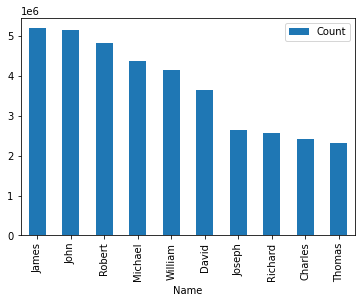

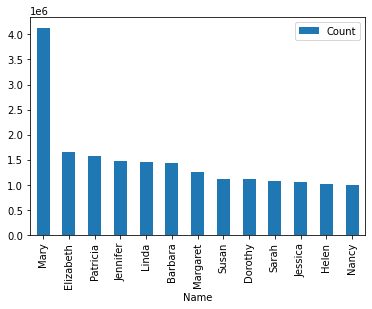

In [43]:
df_name_stats.sort_values(by="Count", inplace=True, ascending=False) # sort internally by Count, descending
df_name_stats.reset_index(drop=True, inplace=True) # re-index

df = df_name_stats.loc[0:100] # pull out top 100 (by Count)   

df_female = df[df_name_stats["Gender"] == "F"]    
df_male = df[df_name_stats["Gender"] == "M"]  
print(df_female.head(10))
print(df_male.head(10))

df_male = df_male.loc[0:10]
df_male.plot.bar(x="Name", y="Count", rot=90) # rotate labels
plt.show()

df_female = df_female.loc[0:40]
df_female.plot.bar(x="Name", y="Count", rot=90) # rotate labels
plt.show()

One interesting thing to note is that while some of these names are incredibly popular over time, they peaked in their popularity in the middle of the 20th century. 

Total number of unique names by year. To show how this might impact the all time popularity of a name, let's see how the name bank has grown.

# Question #2: How many unique names were given each year distributed by many persons. 

In [76]:
df_ay = pd.read_csv("ssn_files/all_years.csv")
print(df_ay)

#y = []

for i in df_ay:
    i = 1880
    dfy = df_ay.query('2017 == Year')
    total_names = dfy["Year"].count()
    total_given = dfy["Count"].sum()
    if y <= 2020:
        y = y + 1


print(total_names, total_given)



              Name Gender  Count  Year
0             Mary      F   7065  1880
1             Anna      F   2604  1880
2             Emma      F   2003  1880
3        Elizabeth      F   1939  1880
4           Minnie      F   1746  1880
...            ...    ...    ...   ...
2020858     Zykell      M      5  2020
2020859      Zylus      M      5  2020
2020860     Zymari      M      5  2020
2020861        Zyn      M      5  2020
2020862      Zyran      M      5  2020

[2020863 rows x 4 columns]
32634 3568294


It's interesting to note that some names have become less popular over the years and have actually ceased to be used. This prompts the next question. 
# Question #3: Which names have had a shorter longevity run than others?

In [68]:
df = df_name_stats.loc[0:50000] # pull out top 20 (by Count)   


# make a new Duration column
duration = df_name_stats["Last"] - df_name_stats["First"]
df.insert(5, "Duration", duration)

#A calculation must be done to remove names that a recent additions and still popular in 2020
not2020 = df[df["Last"] < 2020]
not2020.sort_values(by="Duration", inplace=True, ascending=True) # sort internally by Count, descending
not2020.reset_index(drop=True, inplace=True) # re-index
print(not2020.head(50))



           Name  Count Gender  First  Last  Duration  Peak
0      Christop   1082      M   1989  1989         0  1989
1      Jacqueli    157      F   1989  1989         0  1989
2      Christia     82      M   1989  1989         0  1989
3      Cassandr    152      F   1989  1989         0  1989
4      Alexandr    301      F   1989  1989         0  1989
5      Nathanie     64      M   1988  1989         1  1989
6     Chastelyn    158      F   2009  2010         1  2009
7        Syesha     64      F   2008  2009         1  2008
8      Trayvond     79      M   1994  1995         1  1994
9          Foch     67      M   1918  1919         1  1918
10     Santresa     64      F   1979  1981         2  1980
11      Lizania     85      F   2006  2008         2  2007
12    Yazleemar     66      F   2014  2016         2  2015
13       Tareva     85      F   1985  1987         2  1986
14     Alexande    314      M   1987  1989         2  1989
15        Child     78      M   2010  2012         2  20

<ipython-input-68-1debabaafdae>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not2020.sort_values(by="Duration", inplace=True, ascending=True) # sort internally by Count, descending


But let's be honest, you really just want to know about your own name. 
# Question #3: Input your name, or a series of names below to look it up.

In [63]:
enter_name = ["Timothy"]

myname = df_name_stats.query('Name == @enter_name')
print(myname)

         Name    Count Gender  First  Last  Peak
36    Timothy  1075095      M   1880  2020  1959
4473  Timothy     4325      F   1921  2016  1981


# Question #4:   ? # 

In [ ]:
# Better: what are the 5 most popular names by year?

So forget the most popular names. Show me a grouping of names, perhaps my family or something like that that I'm interested in. Visualizing how it changes will make understanding is rise or fall in use.

# Question #5: Enter a list of names to see them on the same graph. #

James (M): 5190161 total hits
John (M): 5142243 total hits
Jonathan (M): 850006 total hits
John (F): 21715 total hits


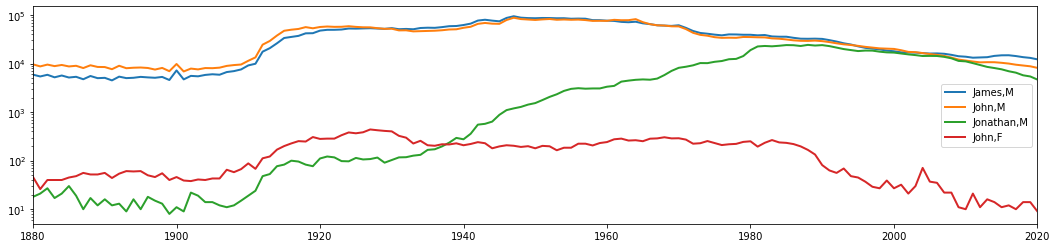

In [74]:
df = pd.read_csv("ssn_files/all_years.csv")
#print(df.head(10)) # To confirm the correct data is loading

plt. figure(figsize=(18, 4)) # set up aspect


# Name/gender as a list, many of these
name_lst = [["James","M"], 
            ["John","M"],
            ["Jonathan","M"],
            ["John","F"]
        ]

for nd in name_lst:
    name = nd[0]
    gender = nd[1]
    

    dfn = df.query('Name == @name and Gender==@gender')
    total = dfn["Count"].sum()

    print(f"{name} ({gender}): {total} total hits")

    plt.plot( 'Year', 'Count', data=dfn, 
            linewidth=2,
            label=name+","+gender)

# show legend
plt.legend()
plt.xlim(1880, 2020) #

plt.yscale('log') # log scale makes more sense to me ...

# show graph
plt.show()

What are the 5 most popular names by year?